# 연봉데이터
* 분석 목적 : 학력, 교육, 연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기 
* 연봉이 5만달러 이상인지 아닌지
<br><br><br>
< To Do List > 
1. 데이터 로딩
2. 전처리
3. EDA
4. Feature Engineering
5. 데이터분리 및 분석

* modeling
* 성능 검증
* 하이퍼파라미터 튜닝
<br><br>
* 기본모델 : DecisionTree - 성능 기준
* 배깅
* 부스팅
* 랜덤배깅

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 기본으로 import 하는 내용

"https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv"

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [4]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

- age : 나이
- workclass : 일 유형 / 고용형태
- education : 교육수준
- education.num : 교육수준 - 어느 학년까지 받았는지?
- marital.status : 결혼 상태
- occupation : 직업
- relationship : 가족관계
- race : 인종
- sex : 성별
- capital.gain : 자본 이익
- capital.loss : 자본 손실
- hours.per.week : 주당 근무시간 --> 나중에 'working_hours'로 바꿈
- native.country : 본 국적
- class : 소득 --> 나중에 'income'으로 바꿈
    * 0 = <=50K (5만 달러 이하)
    * 1 = >50K (5만 달러 초과) 

* workclass 
* occupation
* native-country

에서 결측값이 발견됨

In [5]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.isna().sum()

# 각 컬럼별로 True 인 얘들만 sum 해줌

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [7]:
len(data)

# 데이터 전체 개수

48842

결측치 / 전체데이터 * 100 = 결측의 비율

In [8]:
data.isna().sum() / len(data) * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [9]:
data['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [10]:
data['workclass'].value_counts()

# nan 결측값 : 2799 개 
# 결측비율 : 5 % 

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [11]:
data['workclass'] = data['workclass'].fillna('Unknown')

# 결측값 NaN 을 'Unknow'으로 채우기 

In [12]:
data['workclass'].value_counts()

# nan 결측값 : 2799 개 = Unknown 으로 바뀜
# 결측비율 : 5 % 

workclass
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
Unknown               2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: count, dtype: int64

In [13]:
data['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', nan,
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [14]:
data['occupation'].value_counts()

# nan 결측값 : 2809 개 
# 결측비율 : 5 % 

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [15]:
data['occupation'] = data['occupation'].fillna('Unknown')

# 결측값 NaN 을 'Unknow'으로 채우기 

In [16]:
data['occupation'].value_counts()

# nan 결측값 : 2809 개 = Unknown 으로 바뀜
# 결측비율 : 5 % 

occupation
 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
Unknown               2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: count, dtype: int64

In [17]:
data['native-country'].unique()

array([' United-States', nan, ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France', ' Holand-Netherlands'],
      dtype=object)

In [18]:
data['native-country'].value_counts()

# nan 결측값 : 857 개 
# 결측비율 : 1 % 

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [19]:
data['native-country'] = data['native-country'].fillna('Unknown')

# 결측값 NaN 을 'Unknow'으로 채우기 

In [20]:
data['native-country'].value_counts()

# nan 결측값 : 857 개 = Unknown 으로 바뀜
# 결측비율 : 1 % 

native-country
 United-States                 43832
 Mexico                          951
Unknown                          857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua             

In [21]:
# 칼럼들 하나하나 까보기 

data.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Unknown,HS-grad,9,Never-married,Unknown,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [22]:
data['education'].value_counts()

#  교육 어디까지 받았는지 

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [23]:
data['education-num'].value_counts()

#  교육 몇학년까지 받았는지 

education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

In [24]:
data['marital-status'].value_counts()

# 혼인 여부 등

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [25]:
data['occupation'].value_counts()

# 직업 종류

occupation
 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
Unknown               2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: count, dtype: int64

In [26]:
data['relationship'].value_counts()

# 가족 관계 여부 등 

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [27]:
data['race'].value_counts()

# 인종 다양함

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [28]:
data['sex'].value_counts()

# 남 vs 여

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [29]:
data['capital-gain'].value_counts()



capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64

In [30]:
data['capital-loss'].value_counts()



capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: count, Length: 99, dtype: int64

In [31]:
data['hours-per-week'].value_counts()



hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
87        1
94        1
82        1
79        1
Name: count, Length: 96, dtype: int64

In [32]:
data['class'].value_counts()

# 연봉

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

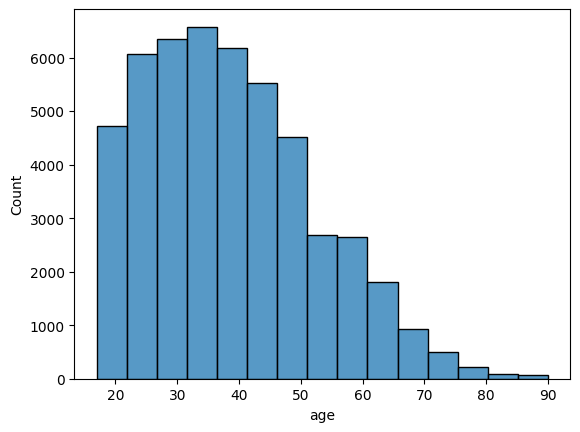

In [33]:
sns.histplot(data['age'], bins=15)

# 분포를 볼 수 있다. 

<Axes: xlabel='race'>

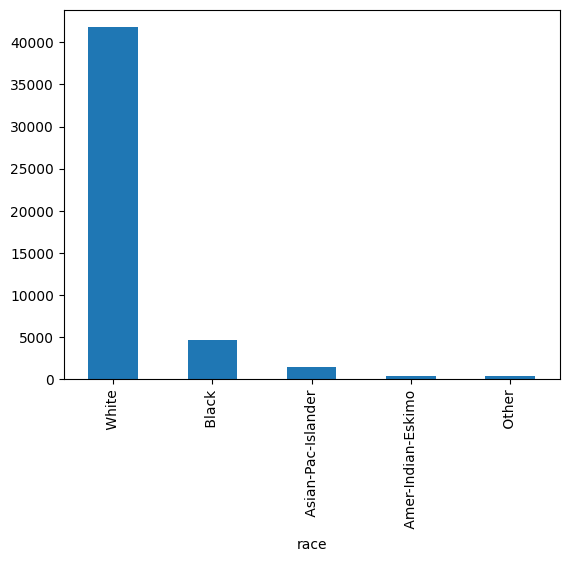

In [34]:
data['race'].value_counts().plot(kind='bar')



<Axes: xlabel='class'>

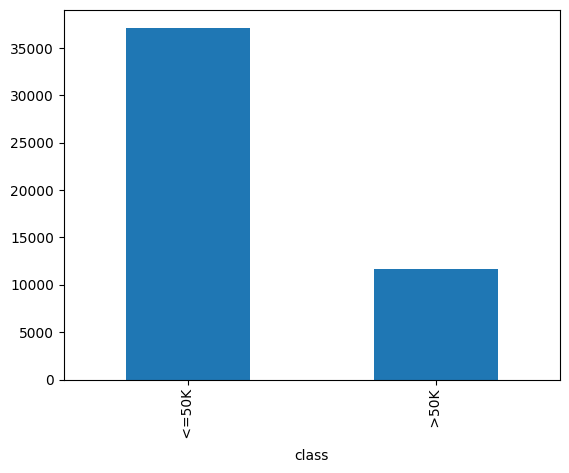

In [35]:
data['class'].value_counts().plot(kind='bar')



0 : <=50K (5만 달러 이하)  <br>
1 : >50K (5만 달러 초과)   <br>

결론 : 5만달러 이하인 사람들의 비율이 더 높다 

In [36]:
# 먼저 class 칼럼 이름을 income 으로 바꾸기 
# 컬럼명을 "class" -->  "income"  로 변경하기 


data = data.rename(columns = {"class" : "income"})
data 


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [37]:
# 먼저 'hours-per-week' 칼럼 이름을 'working_hours' 으로 바꾸기 
# 컬럼명을 "hours-per-week" -->  "working_hours"  로 변경하기 


data = data.rename(columns = {"hours-per-week" : "working_hours"})
data 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,working_hours,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [39]:
# income 칼럼을 0, 1 숫자형으로 변환하기 
# 0 : <=50K (5만 달러 이하)
# 1 : >50K (5만 달러 초과)

def em2num(x):
    if x == " <=50K":
        return 0
    elif x == " >50K":
        return 1

In [40]:
data['income'] = data['income'].apply(em2num)
data.info()

# 연봉 소득 'income' 칼럼이 int로 변경 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  working_hours   48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [41]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,working_hours,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,0


# -------------------------------------------------------------------------------

In [42]:
data.info()

# 결측치 없는 완벽한(?) 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  working_hours   48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [43]:
# 인종과 연봉의 관계 

data.groupby('race')['income'].value_counts(sort=False)

# 0 : <=50K (5만 달러 이하)
# 1 : >50K (5만 달러 초과)


race                income
Amer-Indian-Eskimo  0           415
                    1            55
Asian-Pac-Islander  0          1110
                    1           409
Black               0          4119
                    1           566
Other               0           356
                    1            50
White               0         31155
                    1         10607
Name: count, dtype: int64

In [44]:
data['education'].value_counts()

#  교육 어디까지 받았는지 

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [45]:
data['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [46]:
# capital-gain 칼럼, capital-loss 칼럼 삭제하기 
# 별로 쓸데없음

data.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,working_hours,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,18,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,30,United-States,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   working_hours   48842 non-null  int64 
 10  native-country  48842 non-null  object
 11  income          48842 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [48]:
# sns.histplot(data['capital-gain'], bins=15)

# # 분포를 볼 수 있다. 

In [49]:
# sns.histplot(data['capital-loss'], bins=15)

# # 분포를 볼 수 있다. 

<Axes: xlabel='relationship'>

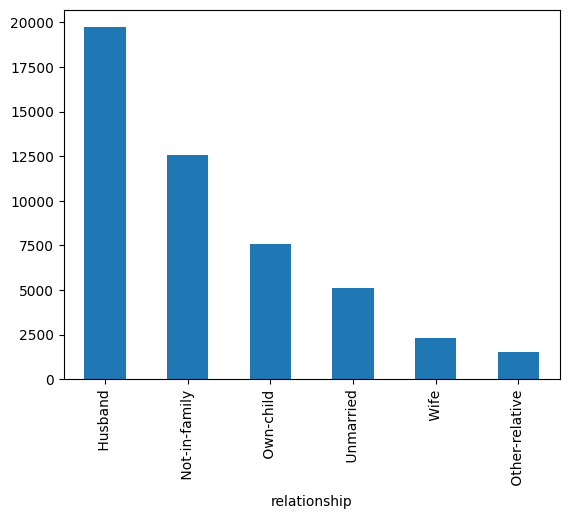

In [50]:
data['relationship'].value_counts().plot(kind='bar')



#### 카테고리 변수들의 자료에 공백이 있어 공백을 제거

In [51]:
data[data['education'] == ' Bachelors'].head()

# 'Bachelors' 검색하면 안나오지만
# ' Bachelors' 공백 띄고 검색하면 나옴
# 공백을 제거해야 함

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,working_hours,native-country,income
11,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,0
20,34,Private,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,47,United-States,1
23,25,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,43,Peru,0
24,25,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,0
32,24,Self-emp-not-inc,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,50,United-States,0


In [52]:
cols = list(data.columns)
cols

['age',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'working_hours',
 'native-country',
 'income']

In [53]:
data['education'].apply(lambda x: x.strip())

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: object

In [54]:
for col in cols:
    if data[col].dtype == 'O':
        data[col] = data[col].apply(lambda x: x.strip())

In [55]:
for col in cols:
    if data[col].dtype == 'O':
        print(col, data[col].unique())

workclass ['Private' 'Local-gov' 'Unknown' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Unknown'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex ['Male' 'Female']
native-country ['United-States' 'Unknown' 'Peru' 'Guatemala' 'Mexico'
 'Dominican-Republic' 'Ireland' 'Germany'

In [56]:
data[data['education'] == 'Bachelors'].head()

# 공백을 제거한 후 제대로 나옴

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,working_hours,native-country,income
11,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,0
20,34,Private,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,47,United-States,1
23,25,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,43,Peru,0
24,25,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,0
32,24,Self-emp-not-inc,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,50,United-States,0


In [57]:
data[data['education'] == 'Bachelors']['income'].value_counts()

# 0 : <=50K (5만 달러 이하)
# 1 : >50K (5만 달러 초과)
# 결론 : 'Bachelors' 인 학사 학위를 가진 사람의 연봉은 비슷하다

income
0    4712
1    3313
Name: count, dtype: int64

In [58]:
data[data['education'] == 'Masters']['income'].value_counts()

# 결론 : 'Masters' 인 석사 학위를 가진 사람의 연봉

income
1    1459
0    1198
Name: count, dtype: int64

In [59]:
data[data['education'] == 'Preschool']['income'].value_counts()

# 결론 : 'Preschool' 유치원만 졸업한 사람의 연봉은 대체적으로 5만달러 이하다. 

income
0    82
1     1
Name: count, dtype: int64

### 학력에 따른 연봉 비교하기 

< education > 
* HS-grad         (15784명)
* Some-college    (10878명)
* Bachelors        (8025명)
* Masters          (2657명)    <br>
...
* Preschool          (83명)

In [60]:
data[data['education'] == 'HS-grad']['income'].value_counts()

# HS-grad : High Sschool grade 고등학교 졸업자 비율 : 15784 개로 가장 높았음. 
# 결론 : 고등학교 졸업자들은 대체적으로 연봉이 5만달러 이하다. 

income
0    13281
1     2503
Name: count, dtype: int64

In [61]:
data[data['education'] == 'Some-college']['income'].value_counts()

# Some-college : 2년제 대학교 졸업자들도 대체적으로 5만달러 이하의 연봉을 받는다. 

income
0    8815
1    2063
Name: count, dtype: int64

In [62]:
data[data['education'] == 'Doctorate']['income'].value_counts()

# Doctorate : 박사학위 졸업자들도 대체적으로 5만달러 이상의 연봉을 받는다.

income
1    431
0    163
Name: count, dtype: int64

## 학력에 따른 연봉 비교하기 

< education > 
* HS-grad         (15784명) : 고등학교 졸업자들은 대체적으로 연봉이 5만달러 이하다. 
* Some-college    (10878명) : 2년제 대학교 졸업자들도 대체적으로 5만달러 이하의 연봉을 받는다. 
* Bachelors        (8025명) : 학사학위를 가진 사람의 연봉은 비슷하다. 0 : 4712 > 1 : 3313
* Masters          (2657명) : 석사학위를 가진 사람의 연봉은 비슷하다. 0 : 1198 < 1 : 1459
<br>
...
* Preschool          (83명) : 유치원만 졸업한 사람의 연봉은 대체적으로 5만달러 이하다. 


<br><br>
* 0 : <=50K (5만 달러 이하)
* 1 : >50K (5만 달러 초과)


<br><br>
- 학사(Bachelor)
- 석사(Master)
- 박사(Doctor)

<Axes: xlabel='income,education'>

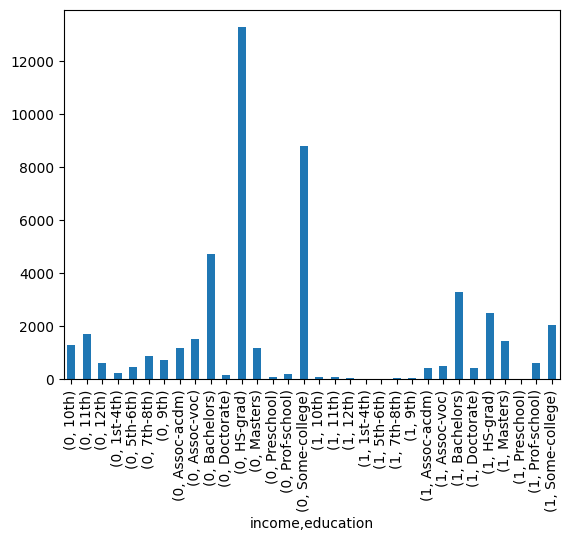

In [63]:
data[['education', 'income']].groupby('income').value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='age', ylabel='Count'>

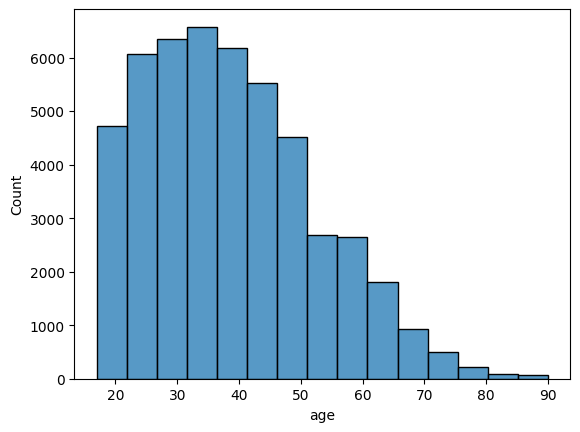

In [64]:
sns.histplot(data['age'], bins=15)

# 분포를 볼 수 있다. 

In [65]:
def ages(x):
    if 0 < x < 10:
        return 0
    elif 10 <= x < 20:
        return 10
    elif 20 <= x < 30:
        return 20
    elif 30 <= x < 40:
        return 30
    elif 40 <= x < 50:
        return 40
    elif 50 <= x < 60:
        return 50
    elif 60 <= x < 70:
        return 60
    elif 70 <= x < 80:
        return 70
    elif 80 <= x < 90:
        return 80
    elif 90 <= x < 100:
        return 90

In [66]:
data['age'] = data['age'].apply(ages)
data.head()


# 10대, 20대 등 구간화 완료!
# 카테고리 변수 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,working_hours,native-country,income
0,20,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,30,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,20,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,40,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,10,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,30,United-States,0


<Axes: xlabel='age', ylabel='Count'>

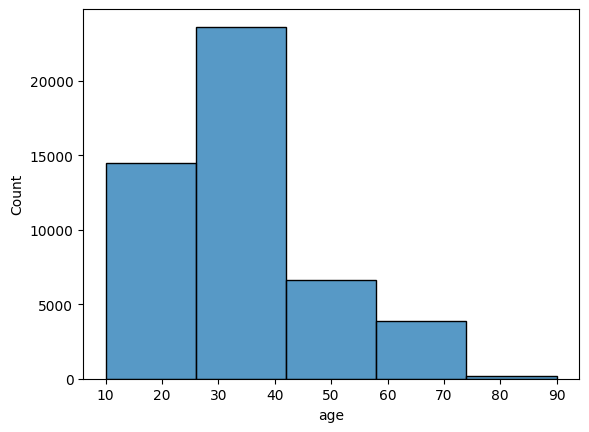

In [67]:
sns.histplot(data['age'], bins=5)

# 분포를 볼 수 있다. 

In [68]:
data[['age','income']].groupby('age').value_counts(sort=False)

age  income
10   0          2507
     1             3
20   0         11262
     1           743
30   0          9468
     1          3461
40   0          6738
     1          3986
50   0          4110
     1          2509
60   0          2245
     1           809
70   0           668
     1           147
80   0           115
     1            16
90   0            42
     1            13
Name: count, dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   working_hours   48842 non-null  int64 
 10  native-country  48842 non-null  object
 11  income          48842 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [70]:
data.describe()

,age,education-num,working_hours,income
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,34.165268,10.078089,40.422382,0.239282
std,14.060112,2.570973,12.391444,0.426649
min,10.000000,1.000000,1.000000,0.000000
25%,20.000000,9.000000,40.000000,0.000000
50%,30.000000,10.000000,40.000000,0.000000
75%,40.000000,12.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000


### 이상치 탐지

In [71]:
data.describe()

,age,education-num,working_hours,income
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,34.165268,10.078089,40.422382,0.239282
std,14.060112,2.570973,12.391444,0.426649
min,10.000000,1.000000,1.000000,0.000000
25%,20.000000,9.000000,40.000000,0.000000
50%,30.000000,10.000000,40.000000,0.000000
75%,40.000000,12.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000


In [72]:
search_outlier = data.describe()

In [73]:
search_outlier.loc['75%', :] + (1.5 * search_outlier.loc['75%', :] - search_outlier.loc['25%', :])

age              80.0
education-num    21.0
working_hours    72.5
income            0.0
dtype: float64

In [74]:
search_outlier

,age,education-num,working_hours,income
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,34.165268,10.078089,40.422382,0.239282
std,14.060112,2.570973,12.391444,0.426649
min,10.000000,1.000000,1.000000,0.000000
25%,20.000000,9.000000,40.000000,0.000000
50%,30.000000,10.000000,40.000000,0.000000
75%,40.000000,12.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   working_hours   48842 non-null  int64 
 10  native-country  48842 non-null  object
 11  income          48842 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [76]:
type(data['age'])

pandas.core.series.Series

In [77]:
# native-country 삭제하기 
# 별로 쓸데없음

data.drop(['native-country'], axis=1, inplace=True)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,working_hours,income
0,20,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0
1,30,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0
2,20,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1
3,40,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1
4,10,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,30,0


In [78]:
# sex 칼럼을 0, 1 숫자형으로 변환하기 
# 0 : male
# 1 : female


def em3num(x):
    if x == "Male":
        return 0
    elif x == "Female":
        return 1

In [79]:
data['sex'] = data['sex'].apply(em3num)
data.info()

# 성별 'sex' 칼럼이 int로 변경 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  int64 
 9   working_hours   48842 non-null  int64 
 10  income          48842 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.1+ MB


In [80]:
data.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,working_hours,income
0,20,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,40,0
1,30,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,50,0
2,20,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,40,1
3,40,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,40,1
4,10,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,1,30,0
5,30,Private,10th,6,Never-married,Other-service,Not-in-family,White,0,30,0
6,20,Unknown,HS-grad,9,Never-married,Unknown,Unmarried,Black,0,40,0
7,60,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,0,32,1
8,20,Private,Some-college,10,Never-married,Other-service,Unmarried,White,1,40,0
9,50,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,0,10,0


In [81]:
data['workclass'].value_counts()

# nan 결측값 : 2799 개 = Unknown 으로 바뀜
# 결측비율 : 5 % 

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [82]:
# workclass 칼럼을 0, 1, 2, 3, 4 등 숫자형으로 변환하기 
# 0 : Private             
# 1 : Self-emp-not-inc     
# 2 : Local-gov            
# 3 : Unknown              
# 4 : State-gov            
# 5 : Self-emp-inc         
# 6 : Federal-gov          
# 7 : Without-pay            
# 8 : Never-worked           

def em4num(x):
    if x == "Private":
        return 0
    elif x == "Self-emp-not-inc":
        return 1
    elif x == "Local-gov":
        return 2
    elif x == "Unknown":
        return 3
    elif x == "State-gov":
        return 4
    elif x == "Self-emp-inc":
        return 5
    elif x == "Federal-gov":
        return 6
    elif x == "Without-pay":
        return 7
    elif x == "Never-worked":
        return 8
    

In [83]:
data['workclass'] = data['workclass'].apply(em4num)
data.info()

# 고용형태 'workclass' 칼럼이 int로 변경 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  int64 
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  int64 
 9   working_hours   48842 non-null  int64 
 10  income          48842 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 4.1+ MB


In [84]:
data['education'].value_counts()



education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

* 0 = 10th
* 1 = 11th
* 2 = 12th
* 3 = 1st-4th
* 4 = 5th-6th
* 5 = 7th-8th
* 6 = 9th
* 7 = Assoc-acdm
* 8 = Assoc-voc
* 9 = Bachelors
* 10 = Doctorate
* 11 = HS-grad
* 12 = Masters
* 13 = Preschool 
* 14 = Prof-school
* 15 = Some-college

In [85]:
def em5num(x):
    if x == "10th":
        return 0
    elif x == "11th":
        return 1
    elif x == "12th":
        return 2
    elif x == "1st-4th":
        return 3
    elif x == "5th-6th":
        return 4
    elif x == "7th-8th":
        return 5
    elif x == "9th":
        return 6
    elif x == "Assoc-acdm":
        return 7
    elif x == "Assoc-voc":
        return 8
    elif x == "Bachelors":
        return 9
    elif x == "Doctorate":
        return 10
    elif x == "HS-grad":
        return 11
    elif x == "Masters":
        return 12
    elif x == "Preschool":
        return 13
    elif x == "Prof-school":
        return 14
    elif x == "Some-college":
        return 15
    

In [86]:
data['education'] = data['education'].apply(em5num)
data.info()

#  교육수준 'education' 칼럼이 int로 변경 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  int64 
 2   education       48842 non-null  int64 
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  int64 
 9   working_hours   48842 non-null  int64 
 10  income          48842 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 4.1+ MB


In [87]:
data['marital-status'].value_counts()

# 혼인 여부 등

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [88]:
def em6num(x):
    if x == "Married-civ-spouse":
        return 0
    elif x == "Never-married":
        return 1
    elif x == "Divorced":
        return 2
    elif x == "Separated":
        return 3
    elif x == "Widowed":
        return 4
    elif x == "Married-spouse-absent":
        return 5
    elif x == "Married-AF-spouse":
        return 6
   

In [89]:
data['marital-status'] = data['marital-status'].apply(em6num)
data.info()

# 혼인여부 칼럼 숫자로 변경 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  int64 
 2   education       48842 non-null  int64 
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  int64 
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  int64 
 9   working_hours   48842 non-null  int64 
 10  income          48842 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.1+ MB


In [90]:
data['occupation'].value_counts()

# 직업 종류

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [91]:
def em7num(x):
    if x == "Prof-specialty":
        return 0
    elif x == "Craft-repair":
        return 1
    elif x == "Exec-managerial":
        return 2
    elif x == "Adm-clerical":
        return 3
    elif x == "Sales":
        return 4
    elif x == "Other-service":
        return 5
    elif x == "Machine-op-inspct":
        return 6
    elif x == "Unknown":
        return 7
    elif x == "Transport-moving":
        return 8
    elif x == "Handlers-cleaners":
        return 9
    elif x == "Farming-fishing":
        return 10
    elif x == "Tech-support":
        return 11
    elif x == "Protective-serv":
        return 12
    elif x == "Priv-house-serv":
        return 13
    elif x == "Armed-Forces":
        return 14

In [92]:
data['occupation'] = data['occupation'].apply(em7num)
data.info()

# 직업종류 숫자로 변경 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  int64 
 2   education       48842 non-null  int64 
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  int64 
 5   occupation      48842 non-null  int64 
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  int64 
 9   working_hours   48842 non-null  int64 
 10  income          48842 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 4.1+ MB


In [93]:
data['relationship'].value_counts()

# 가족 관계 여부 등 

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [94]:
def em8num(x):
    if x == "Husband":
        return 0
    elif x == "Not-in-family":
        return 1
    elif x == "Own-child":
        return 2
    elif x == "Unmarried":
        return 3
    elif x == "Wife":
        return 4
    elif x == "Other-relative":
        return 5

In [95]:
data['relationship'] = data['relationship'].apply(em8num)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  int64 
 2   education       48842 non-null  int64 
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  int64 
 5   occupation      48842 non-null  int64 
 6   relationship    48842 non-null  int64 
 7   race            48842 non-null  object
 8   sex             48842 non-null  int64 
 9   working_hours   48842 non-null  int64 
 10  income          48842 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 4.1+ MB


In [96]:
data['race'].value_counts()

# 인종 다양함

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [97]:
def em9num(x):
    if x == "White":
        return 0
    elif x == "Black":
        return 1
    elif x == "Asian-Pac-Islander":
        return 2
    elif x == "Amer-Indian-Eskimo":
        return 3
    elif x == "Other":
        return 4

In [98]:
data['race'] = data['race'].apply(em9num)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   workclass       48842 non-null  int64
 2   education       48842 non-null  int64
 3   education-num   48842 non-null  int64
 4   marital-status  48842 non-null  int64
 5   occupation      48842 non-null  int64
 6   relationship    48842 non-null  int64
 7   race            48842 non-null  int64
 8   sex             48842 non-null  int64
 9   working_hours   48842 non-null  int64
 10  income          48842 non-null  int64
dtypes: int64(11)
memory usage: 4.1 MB


In [99]:
# bins = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# labels = ['under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
# data['age'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


## 이런식으로 힘수 대신 사용할 수 있음!

# ----------------------------------------------------------------

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [101]:
X = data.drop('income', axis=1)
y = data['income']

In [102]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,working_hours
0,20,0,1,7,1,6,2,1,0,40
1,30,0,11,9,0,10,0,0,0,50
2,20,2,7,12,0,12,0,0,0,40
3,40,0,15,10,0,6,0,1,0,40
4,10,3,15,10,1,7,2,0,1,30
...,...,...,...,...,...,...,...,...,...,...
48837,20,0,7,12,0,11,4,0,1,38
48838,40,0,11,9,0,6,0,0,0,40
48839,50,0,11,9,4,3,3,0,1,40
48840,20,0,11,9,1,3,2,0,0,20


In [103]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [105]:
dtc = DecisionTreeClassifier(max_depth= 2, random_state=7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print("accuracy_score", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

accuracy_score 0.8175862421946976
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7459
           1       0.70      0.40      0.51      2310

    accuracy                           0.82      9769
   macro avg       0.77      0.67      0.70      9769
weighted avg       0.80      0.82      0.80      9769



In [106]:
for i in range(1, 20):
    dtc = DecisionTreeClassifier(max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.7635377213634967
1               precision    recall  f1-score   support

           0       0.76      1.00      0.87      7459
           1       0.00      0.00      0.00      2310

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769

2 0.8175862421946976
2               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7459
           1       0.70      0.40      0.51      2310

    accuracy                           0.82      9769
   macro avg       0.77      0.67      0.70      9769
weighted avg       0.80      0.82      0.80      9769

3 0.8189169822909202
3               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7459
           1       0.72      0.38      0.50      2310

    accuracy                           0.82      9769
   macro avg       0.78      0.67      0.69      9769
weigh

C:\Users\5-05\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\5-05\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\5-05\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


6 0.8244446719213839
6               precision    recall  f1-score   support

           0       0.87      0.90      0.89      7459
           1       0.64      0.58      0.61      2310

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769

7 0.8248541304125294
7               precision    recall  f1-score   support

           0       0.88      0.90      0.89      7459
           1       0.64      0.59      0.61      2310

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769

8 0.8339645818405159
8               precision    recall  f1-score   support

           0       0.87      0.93      0.89      7459
           1       0.69      0.53      0.60      2310

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weigh

max_depth = 8 일 때, 정확도가 83%로 가장 높다. 

In [107]:
dtc = DecisionTreeClassifier(max_depth= 8, random_state=7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print("accuracy_score", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# 83% 

accuracy_score 0.8336574879721568
              precision    recall  f1-score   support

           0       0.87      0.93      0.89      7459
           1       0.69      0.54      0.60      2310

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.82      0.83      0.83      9769



## 앙상블 분석의 종류
* 배깅 (Bagging) 
* 부스팅 (Boosting) 
    * 1. ADABoost (에이다 부스트) 
    * 2. Gradient Boost (그래디언트 부스트)
    * 3. XGBookst (XG부스트)
    * 4. LightGBM (라이트 GBM)
 * 랜덤배깅 (Random Bagging)
    * 1. Random Forest (랜덤포레스트) 

In [108]:
# 배깅 

from sklearn.ensemble import BaggingClassifier

In [109]:
bc = BaggingClassifier(n_estimators=80, n_jobs=7, random_state=7)

bc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8142082096427474
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7459
           1       0.62      0.57      0.59      2310

    accuracy                           0.81      9769
   macro avg       0.74      0.73      0.74      9769
weighted avg       0.81      0.81      0.81      9769



In [110]:
from sklearn.svm import SVC

In [111]:
# bc = BaggingClassifier(estimator=SVC(), n_estimators=100, n_jobs=7, random_state=7)

# bc.fit(X_train, y_train)
# pred = bc.predict(X_test)
# print(accuracy_score(y_test, pred))
# print(classification_report(y_test, pred))

In [112]:
# 에이다 부스팅

from sklearn.ensemble import AdaBoostClassifier

In [113]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate = 0.1, random_state=8)

ada.fit(X_train, y_train)
pred = ada.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

C:\Users\5-05\miniforge3\envs\fintech\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8221926502200839
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7459
           1       0.73      0.40      0.51      2310

    accuracy                           0.82      9769
   macro avg       0.78      0.67      0.70      9769
weighted avg       0.81      0.82      0.80      9769



In [114]:
# 그래디언트 부스팅

from sklearn.ensemble import GradientBoostingClassifier

In [115]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, random_state=8)

gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8353976865595251
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7459
           1       0.68      0.56      0.62      2310

    accuracy                           0.84      9769
   macro avg       0.78      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In [116]:
#  XGBoost

from xgboost import XGBClassifier

In [117]:
xgb = XGBClassifier(n_estimators=100, max_depth = 7, random_state=8, n_jobs=-1)

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8379568021291841
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7459
           1       0.68      0.59      0.63      2310

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In [118]:
# LightGBM (라이트 GBM)

from lightgbm import LGBMClassifier

In [119]:
lgbm = LGBMClassifier(n_estimators=100, max_depth = 3, learning_rate = 0.1, random_state=8, n_jobs=-1)

lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[LightGBM] [Info] Number of positive: 9377, number of negative: 29696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239987 -> initscore=-1.152752
[LightGBM] [Info] Start training from score -1.152752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [120]:
# 랜덤배깅 (= 랜덤포레스트, RandomForest)

from sklearn.ensemble import RandomForestClassifier

In [121]:
rfc = RandomForestClassifier(n_estimators= 100, random_state= 8, n_jobs= -1)

rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8190193469137066
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7459
           1       0.63      0.58      0.60      2310

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.82      9769

